In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('./data/developer_survey_2019/survey_results_public.csv')

## Age vs dependents

In [3]:
age_vs_dep = df[['Age','Dependents']].dropna(how='any')
age_vs_dep.head()

,Age,Dependents
0,14.0,No
1,19.0,No
2,28.0,Yes
3,22.0,No
4,30.0,No


In [4]:
grouped = age_vs_dep.groupby('Dependents')
grouped.mean()

,Age
Dependents,
No,28.061923
Yes,34.113780


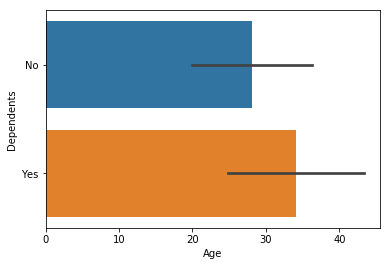

In [5]:
ax = sns.barplot(x="Age", y="Dependents", data=age_vs_dep,ci='sd')

## Conclusion
Similar to population average

## Imposter Syndrome

In [6]:
imp_vs_sat = df[['ImpSyn','JobSat']].dropna(how='any')
imp_vs_sat.head()

,ImpSyn,JobSat
2,Average,Slightly satisfied
3,A little below average,Slightly satisfied
4,A little above average,Slightly dissatisfied
5,A little above average,Slightly satisfied
6,Average,Neither satisfied nor dissatisfied


In [7]:
imp_vs_sat['ImpSyn'].unique()

array(['Average', 'A little below average', 'A little above average',
       'Far above average', 'Far below average'], dtype=object)

In [8]:
imp_syn_lut = {
    'Far below average': 0,
    'A little below average': 0.25,
    'Average': 0.5,
    'A little above average': 0.75,
    'Far above average': 1,
}

In [9]:
sat_mapper_lut = {
    'Very dissatisfied' : 0,
    'Slightly dissatisfied' : 0.25,
    'Neither satisfied nor dissatisfied' : 0.5,
    'Slightly satisfied' : 0.75,
    'Very satisfied' : 1,
}

In [10]:
imp_vs_sat['JobSatNum'] = imp_vs_sat.apply(lambda row: sat_mapper_lut[row['JobSat']], axis=1)
imp_vs_sat['ImpSynNum'] = imp_vs_sat.apply(lambda row: imp_syn_lut[row['ImpSyn']], axis=1)
# imp_vs_sat = imp_vs_sat[['JobSatNum','ImpSynNum']]

In [11]:
imp_vs_sat.corr()

,JobSatNum,ImpSynNum
JobSatNum,1.000000,0.110327
ImpSynNum,0.110327,1.000000


In [12]:
grouped = imp_vs_sat.groupby(['JobSatNum','ImpSynNum'])
sizes = grouped.size()
sizes = sizes.reset_index()
pivoted_sizes = sizes.pivot(index='JobSatNum',columns='ImpSynNum')

In [13]:
pivoted_sizes.sortlevel(level=0, inplace=True,ascending=False)
pivoted_sizes

c:\users\windows\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  """Entry point for launching an IPython kernel.


0                         
ImpSynNum 0.00  0.25  0.50   0.75  1.00
JobSatNum                              
1.00       344  1126  4542  10318  5847
0.75       362  1646  5753  11470  4740
0.50       239   752  2534   3529  1510
0.25       295  1119  2699   4584  1964
0.00       239   464  1163   1839  1078

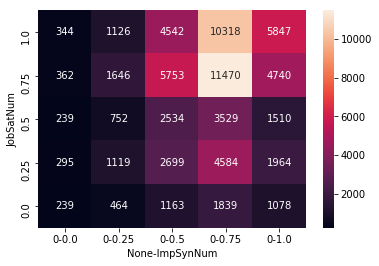

In [14]:
sns.heatmap(pivoted_sizes,annot=True, fmt="d")

In [15]:
americans = df[df['Country'] == 'United States']
imp_vs_salary = americans[['ConvertedComp','ImpSyn']].dropna(how='any')
imp_vs_salary['ImpSynNum'] = imp_vs_salary.apply(lambda row: imp_syn_lut[row['ImpSyn']], axis=1)
imp_vs_salary.corr()

,ConvertedComp,ImpSynNum
ConvertedComp,1.000000,0.009313
ImpSynNum,0.009313,1.000000


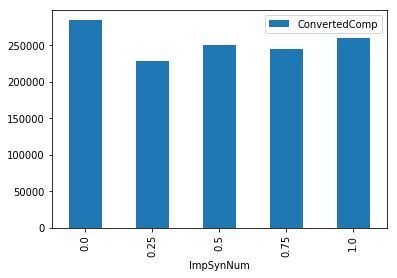

In [16]:
imp_vs_salary.groupby('ImpSynNum').mean().plot.bar()

In [17]:
indians = df[df['Country'] == 'India']
imp_vs_salary = indians[['ConvertedComp','ImpSyn']].dropna(how='any')
imp_vs_salary['ImpSynNum'] = imp_vs_salary.apply(lambda row: imp_syn_lut[row['ImpSyn']], axis=1)
imp_vs_salary.corr()

,ConvertedComp,ImpSynNum
ConvertedComp,1.000000,0.052923
ImpSynNum,0.052923,1.000000


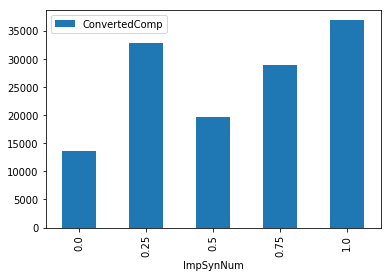

In [18]:
imp_vs_salary.groupby('ImpSynNum').mean().plot.bar()

## Conclusion
Self confidence and job satisfaction are mildly correlated.
Self confidence and salary are significantly correlated in India but not in USA

## Open source contribution vs job satisfaction

In [19]:
df['OpenSourcer'].unique()

array(['Never', 'Less than once per year', 'Once a month or more often',
       'Less than once a month but more than once per year'], dtype=object)

In [20]:
open_sourcer_lut = {
    'Never':0,
    'Less than once per year':0.33,
    'Less than once a month but more than once per year':0.66,
    'Once a month or more often':1,
}

In [21]:
open_vs_job_sat = df[['JobSat','OpenSourcer']].dropna(how='any')
open_vs_job_sat['JobSatNum'] = open_vs_job_sat.apply(lambda row: sat_mapper_lut[row['JobSat']], axis=1)
open_vs_job_sat['OpenSourcerNum'] = open_vs_job_sat.apply(lambda row: open_sourcer_lut[row['OpenSourcer']], axis=1)
open_vs_job_sat.corr()

,JobSatNum,OpenSourcerNum
JobSatNum,1.000000,0.054571
OpenSourcerNum,0.054571,1.000000


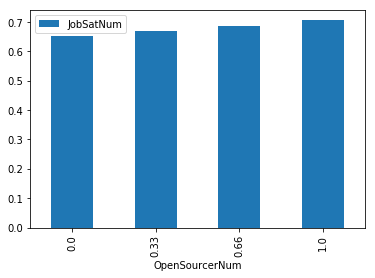

In [22]:
open_vs_job_sat.groupby('OpenSourcerNum').mean().plot.bar()

## Conclusion
Weak positive correlation

## Salary vs org size

In [23]:
sal_vs_size = df[['ConvertedComp','OrgSize']].dropna(how='any')
grouped = sal_vs_size.groupby('OrgSize')
means = grouped.mean()
means.sort_values('ConvertedComp')

,ConvertedComp
OrgSize,
10 to 19 employees,93326.648099
2-9 employees,96194.104392
20 to 99 employees,113087.820770
"Just me - I am a freelancer, sole proprietor, etc.",113136.930323
100 to 499 employees,127505.799209
500 to 999 employees,128330.767649
"1,000 to 4,999 employees",143154.719254
"5,000 to 9,999 employees",157500.936252
"10,000 or more employees",175389.058928


In [24]:
175389/93326

1.8793155176478151

## Conclusion
Larger organisations strictly pay more. ~2 times in the best case scenario. 

## Salary vs years of experience

In [25]:
americans = df[df['Country'] == 'United States']

In [26]:
def get_sal_vs_exp(ddf):
    sal_vs_exp = ddf[['ConvertedComp','YearsCodePro']].dropna(how='any')
    sal_vs_exp = sal_vs_exp[sal_vs_exp['YearsCodePro'] != 'Less than 1 year']
    sal_vs_exp = sal_vs_exp[sal_vs_exp['YearsCodePro'] != 'More than 50 years']
    sal_vs_exp['YearsCodePro'] = pd.to_numeric(sal_vs_exp['YearsCodePro'])
    return sal_vs_exp
sal_vs_exp = get_sal_vs_exp(americans)
sal_vs_exp.corr()

,ConvertedComp,YearsCodePro
ConvertedComp,1.000000,0.010887
YearsCodePro,0.010887,1.000000


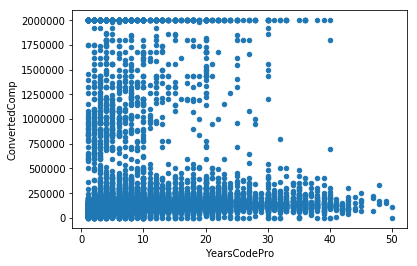

In [27]:
sal_vs_exp.plot.scatter(x='YearsCodePro',y='ConvertedComp')

## Conclusion
More data cleaning needed.

The official analysis does it much better.
https://insights.stackoverflow.com/survey/2019#work-_-salary-and-experience-by-developer-type

10% annual raise (roughly)

## Years of code vs job satisfaction

In [28]:
def yoc_js(ddf):
    age_vs_sat = ddf[['YearsCodePro','JobSat']].dropna(how='any')
    age_vs_sat = age_vs_sat[age_vs_sat['YearsCodePro'] != 'Less than 1 year']
    age_vs_sat = age_vs_sat[age_vs_sat['YearsCodePro'] != 'More than 50 years']
    age_vs_sat['YearsCodePro'] = pd.to_numeric(age_vs_sat['YearsCodePro'])
    age_vs_sat['JobSatNum'] = age_vs_sat.apply(lambda row: sat_mapper_lut[row['JobSat']], axis=1)
    age_vs_sat = age_vs_sat[['YearsCodePro','JobSatNum']]
    return age_vs_sat

c:\users\windows\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


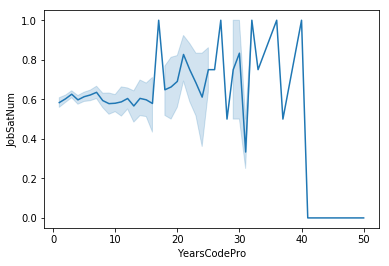

In [29]:
age_vs_sat = yoc_js(df[df['Country'] == 'India'])
ax = sns.lineplot(x="YearsCodePro", y="JobSatNum", data=age_vs_sat)

c:\users\windows\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


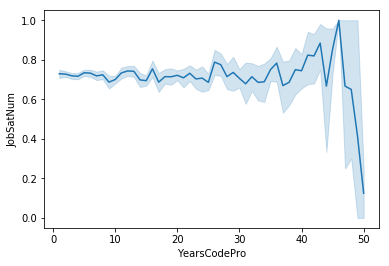

In [30]:
age_vs_sat = yoc_js(df[df['Country'] == 'United States'])
ax = sns.lineplot(x="YearsCodePro", y="JobSatNum", data=age_vs_sat)

## Conclusion
Pretty flat in USA. Sharp rise and high variance in India.